In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

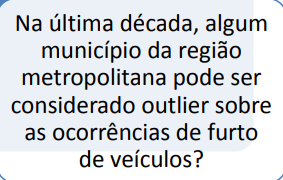

In [13]:
# URL do arquivo CSV fornecido pelo usuário (Base Município Mensal do ISP-RJ)
df_url = "https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv"

In [14]:
# Lista dos municípios que compõem a Região Metropolitana do Rio de Janeiro (RMRJ)
rmrj_municipios = [
    'Rio de Janeiro', 'Niterói', 'São Gonçalo', 'Duque de Caxias', 'Nova Iguaçu',
    'São João de Meriti', 'Belford Roxo', 'Queimados', 'Mesquita', 'Nilópolis',
    'Magé', 'Itaboraí', 'Guapimirim', 'Seropédica', 'Japeri', 'Paracambi',
    'Tanguá', 'Maricá'
]

In [15]:
try:
    # Parâmetros de leitura corretos para o CSV do ISP (separador ';' e encoding 'latin-1')
    df = pd.read_csv(df_url, sep=';', encoding='latin-1')
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")
    exit()

In [16]:
# Seleção das colunas relevantes: ano, nome do município e ocorrência de furto
df_analise = df[['ano', 'mes', 'fmun', 'furto_veiculo']].copy()

# 2. Definição do Período (Última Década)
ano_max = df_analise['ano'].max()
ano_min_decada = ano_max - 9 # Garante 10 anos completos (ex: 2015 a 2024)
df_decada = df_analise[df_analise['ano'] >= ano_min_decada]

print(f" Análise do período: {ano_min_decada} a {ano_max}")
print(f" Total de linhas carregadas: {len(df_analise)}")

KeyError: "['furto_veiculo'] not in index"

In [ ]:
# 3. Filtragem da RMRJ e Agregação do Total de Furtos de Veículos
df_rmrj = df_decada[df_decada['fmun'].isin(rmrj_municipios)]

NameError: name 'df_decada' is not defined

In [ ]:
# Agrupamento para obter o TOTAL de furtos de veículos na década por município
furto_total_rmrj = df_rmrj.groupby('fmun')['furto_veiculo'].sum().sort_values(ascending=False)

In [ ]:

# 4. Cálculo do Outlier (Método Intervalo Interquartil - IQR)
# Cálculo dos quartis (usando numpy.percentile)
Q1 = np.percentile(furto_total_rmrj, 25)
Q2 = np.percentile(furto_total_rmrj, 50)
Q3 = np.percentile(furto_total_rmrj, 75)
IQR = Q3 - Q1
limite_inferior= Q1 - (1.5*IQR)
limite_superior = Q3 + (1.5 * IQR)
# Identificação dos outliers
outliers = furto_total_rmrj[furto_total_rmrj > limite_superior]

# 5. Apresentação dos Resultados
print("Resultados da Análise de Outlier (Furtos de Veículos) ")
print(f"Estatísticas de Furtos na RMRJ (Década):")
print(f"Q1 (25%): {Q1:,.0f} | Q3 (75%): {Q3:,.0f} | IQR: {IQR:,.0f}")
print(f"Limite Inferior: {limite_inferior:,.0f} ocorrências")
print(f"Limite Superior: {limite_superior:,.0f} ocorrências")

print(" Outlier(s) Identificado(s)")
if not outliers.empty:
    print(f"O(s) município(s) considerado(s) outlier(s) (acima de {limite_superior:,.0f} ocorrências) é/são:")
    print(outliers.to_string())
else:
    print("Nenhum município foi estatisticamente classificado como outlier pelo método IQR.")

NameError: name 'df_rmrj' is not defined

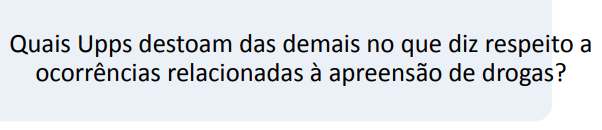

In [ ]:
# URL da planilha do ISP-RJ
url = "https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv"

In [ ]:
# 1. Carregamento, Seleção e Verificação (como solicitado)
df = pd.read_csv(url, sep=';', encoding='latin-1')

In [ ]:
# Colunas usadas: 'ano', 'fmun_cod' e 'apreensao_drogas'
df_analise = df[['ano', 'fmun_cod', 'apreensao_drogas']].copy()

In [ ]:
# 2. Definição do Período (Última Década)
ano_max = df_analise['ano'].max()
ano_min_decada = ano_max - 9
df_decada = df_analise[df_analise['ano'] >= ano_min_decada]

In [ ]:
# 3. Filtragem para UPPs e Agregação
# O filtro usa a coluna 'fmun_cod' e procura o texto 'UPP' em seu conteúdo.
df_upp = df_decada[df_decada['fmun_cod'].str.contains('UPP', na=False)]
drogas_total_upp = df_upp.groupby('fmun_cod')['apreensao_drogas'].sum().sort_values(ascending=False)
drogas_total_upp = drogas_total_upp[drogas_total_upp > 0]

In [ ]:
# 4. Cálculo do Outlier (Método Intervalo Interquartil - IQR)
Q1 = np.percentile(drogas_total_upp, 25)
Q2 = np.percentile(drogas_total_upp, 50)
Q3 = np.percentile(drogas_total_upp, 75)
IQR = Q3 - Q1
cerca_superior = Q3 + 1.5 * IQR

outliers = drogas_total_upp[drogas_total_upp > cerca_superior]

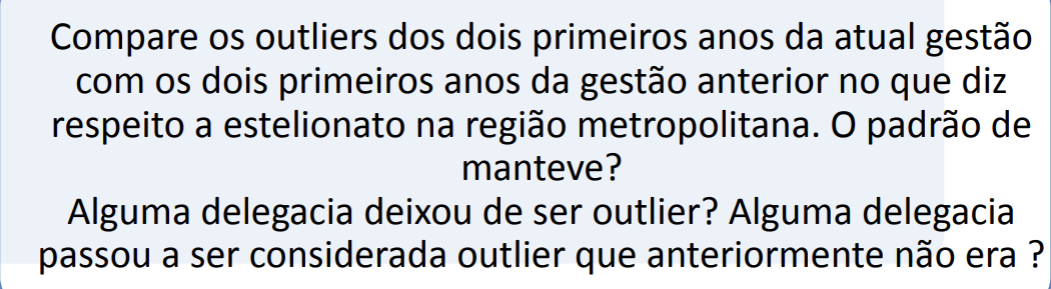

In [ ]:
# URL da planilha do ISP-RJ
url = "https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv"


In [ ]:
df = pd.read_csv(url, sep=';', encoding='latin-1')

In [ ]:

# Seleção das colunas: ano, fmun, estelionato e municipio_name
df_analise = df[['ano', 'fmun', 'estelionato', 'municipio_name']].copy() 

In [ ]:
# Definição dos Períodos de Gestão (G1 e G2)
anos_unicos = df_analise['ano'].unique()
anos_recentes = np.sort(anos_unicos)[::-1] 
if anos_recentes.size < 4:
    print("Dados insuficientes.")
    exit()

In [ ]:
# Definindo os 2 anos mais recentes (G2) e os 2 anteriores (G1)
periodo_G2 = [anos_recentes[1], anos_recentes[0]]
periodo_G1 = [anos_recentes[3], anos_recentes[2]]
print(f"Período G1: {periodo_G1}, Período G2: {periodo_G2}")

In [ ]:
# 2. Filtragem da Região Metropolitana (RMRJ)
rmrj_municipios = ['Rio de Janeiro', 'Niterói', 'São Gonçalo', 'Duque de Caxias', 'Nova Iguaçu', 'São João de Meriti', 'Belford Roxo', 'Queimados', 'Mesquita', 'Nilópolis', 'Magé', 'Itaboraí', 'Guapimirim', 'Seropédica', 'Japeri', 'Paracambi', 'Tanguá', 'Maricá']
df_rmrj = df_analise[df_analise['municipio_name'].isin(rmrj_municipios)].copy()

In [ ]:
# ANÁLISE GESTÃO ANTERIOR (G1)
df_G1 = df_rmrj[df_rmrj['ano'].isin(periodo_G1)]
estelionato_total_G1 = df_G1.groupby('fmun')['estelionato'].sum()
estelionato_total_G1 = estelionato_total_G1[estelionato_total_G1 > 0]

In [ ]:
outliers_G1_index, cerca_G1, Q3_G1 = pd.Index([]), 0, 0
if not estelionato_total_G1.empty:
    Q3_G1 = np.percentile(estelionato_total_G1, 75)
    IQR_G1 = Q3_G1 - np.percentile(estelionato_total_G1, 25)
    cerca_G1 = Q3_G1 + 1.5 * IQR_G1
    outliers_G1_index = estelionato_total_G1[estelionato_total_G1 > cerca_G1].index

In [ ]:
#ANÁLISE GESTÃO ATUAL (G2)
df_G2 = df_rmrj[df_rmrj['ano'].isin(periodo_G2)]
estelionato_total_G2 = df_G2.groupby('fmun')['estelionato'].sum()
estelionato_total_G2 = estelionato_total_G2[estelionato_total_G2 > 0]

outliers_G2_index, cerca_G2, Q3_G2 = pd.Index([]), 0, 0
if not estelionato_total_G2.empty:
    Q3_G2 = np.percentile(estelionato_total_G2, 75)
    IQR_G2 = Q3_G2 - np.percentile(estelionato_total_G2, 25)
    cerca_G2 = Q3_G2 + 1.5 * IQR_G2
    outliers_G2_index = estelionato_total_G2[estelionato_total_G2 > cerca_G2].index


In [ ]:

#Resultados Finais
print("Resultados")
print(f"Volume G1 (Q3): {Q3_G1:,.0f} | Limite Outlier G1: {cerca_G1:,.0f}")
print(f"Volume G2 (Q3): {Q3_G2:,.0f} | Limite Outlier G2: {cerca_G2:,.0f}")
print(f"Outliers G1 ({outliers_G1_index.size} códigos): {set(outliers_G1_index)}")
print(f"Outliers G2 ({outliers_G2_index.size} códigos): {set(outliers_G2_index)}")


In [17]:
# Comparação
outliers_G1_set = set(outliers_G1_index)
outliers_G2_set = set(outliers_G2_index)

G1_sem_G2 = outliers_G1_set - outliers_G2_set
G2_sem_G1 = outliers_G2_set - outliers_G1_set

print("\n--- Mudança de Padrão ---")
if G1_sem_G2 or G2_sem_G1:
    print(" O Padrão de outliers MUDOU.")
else:
    print(" O Padrão de outliers se MANTEVE.")

print(f" Códigos que DEIXARAM de ser outlier (G1 sem G2): {G1_sem_G2 if G1_sem_G2 else 'Nenhum'}")
print(f" Códigos que PASSARAM a ser outlier (G2 sem G1): {G2_sem_G1 if G2_sem_G1 else 'Nenhum'}")

NameError: name 'outliers_G1_index' is not defined